In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [ ]:
cd /content/gdrive/'My Drive'/'Colab Notebooks'/CheatSheets/datasets/

/content/gdrive/My Drive/Colab Notebooks/Kaggle/Competitions/01_House Prices/dataset


In [ ]:
ls

blue_data.csv         proto_data.csv         test.csv
data_description.txt  sample_submission.csv  train.csv


In [ ]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('blue_data.csv')

In [ ]:
data.head()

,Street,Alley,LotFrontage,LotArea,SalePrice,MSZoning_Kfold_Target_Enc,Neighborhood_Kfold_Target_Enc
0,Pave,No Alley,65.00,8450,208500,190731.97,196186.77
1,Pave,No Alley,80.00,9600,181500,190731.97,248900.00
2,Pave,No Alley,68.00,11250,223500,190731.97,196186.77
3,Pave,No Alley,60.00,9550,140000,190731.97,200632.49
4,Pave,No Alley,84.00,14260,250000,190731.97,344343.14


In [ ]:
dummied_data = pd.get_dummies(data,drop_first= True)

In [ ]:
dummied_data.head()

,LotFrontage,LotArea,SalePrice,MSZoning_Kfold_Target_Enc,Neighborhood_Kfold_Target_Enc,Street_Pave,Alley_No Alley,Alley_Pave
0,65.00,8450,208500,190731.97,196186.77,1,1,0
1,80.00,9600,181500,190731.97,248900.00,1,1,0
2,68.00,11250,223500,190731.97,196186.77,1,1,0
3,60.00,9550,140000,190731.97,200632.49,1,1,0
4,84.00,14260,250000,190731.97,344343.14,1,1,0


In [ ]:
X, y = dummied_data.drop('SalePrice',axis = 1), dummied_data['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [ ]:
X_train.head()

,LotFrontage,LotArea,MSZoning_Kfold_Target_Enc,Neighborhood_Kfold_Target_Enc,Street_Pave,Alley_No Alley,Alley_Pave
264,75.00,9000,210888.79,227445.73,1,1,0
587,48.00,6240,190050.22,313793.43,1,1,0
56,72.00,10665,190731.97,196186.77,1,1,0
697,75.00,9525,190050.22,199395.34,1,1,0
1145,62.00,7415,192838.87,193032.11,1,1,0


### dummied_vars = [original names of dummied categorical variables + '_dummy']

In [ ]:
dummied_vars = ['Street_dummy','Alley_dummy']

### input_features = numeric features + dummied_vars

In [ ]:
input_features = list(X_train[['LotFrontage','LotArea','MSZoning_Kfold_Target_Enc','Neighborhood_Kfold_Target_Enc']].columns) + dummied_vars

In [ ]:
input_features

['LotFrontage',
 'LotArea',
 'MSZoning_Kfold_Target_Enc',
 'Neighborhood_Kfold_Target_Enc',
 'Street_dummy',
 'Alley_dummy']

In [ ]:
import time

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import cross_val_score

### Function to do cross validation

In [ ]:
def processSubsetCV(feature_set):

    continous_features = []
    dummied_features = []

    for feature in feature_set:
      if '_dummy' not in feature:
        continous_features.append(feature)
      else:
        dummied_feature = feature[:len(feature)-6]
        for X_train_feature in X_train.columns:

          if dummied_feature in X_train_feature:

            dummied_features.append(X_train_feature)

    actual_feature_set = continous_features + dummied_features

    # Fit model on feature_set and calculate RSS
    # model = sm.OLS(y_train,X_train[actual_feature_set])

    w_model = LinearRegression()

    # w_model = SMWrapper(sm.OLS)
    scores = cross_val_score(w_model, X_train[actual_feature_set], y_train, cv=5, scoring = 'neg_mean_squared_error')

    return {"neg_MSE":scores.mean(),"STD": scores.std(),"features": feature_set}

### Forward Selection

In [ ]:
good_features = []
i = 0
models_best = pd.DataFrame(columns=["neg_MSE", "STD","features"])
while True:
  results = []
  for feature in input_features:
    build_model_features = good_features + [feature]
    results.append(processSubsetCV(build_model_features))

  models = pd.DataFrame(results)
    
  # Choose the model with the lowest RSS
  good_features = models.loc[models['neg_MSE'].argmax()].features
  i += 1
  models_best.loc[i] = models.loc[models['neg_MSE'].argmax()]

  input_features_set = set(input_features)
  good_features_set = set(good_features)
  input_features = list(input_features_set.difference(good_features_set))


  if len(input_features) == 0:
    break

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
models_best

,neg_MSE,STD,features
1,-3131300846.04,1078014745.39,[Neighborhood_Kfold_Target_Enc]
2,-2859636173.54,898882958.67,"[Neighborhood_Kfold_Target_Enc, LotFrontage]"
3,-2853911447.56,897181699.74,"[Neighborhood_Kfold_Target_Enc, LotFrontage, S..."
4,-2854810719.85,886878680.46,"[Neighborhood_Kfold_Target_Enc, LotFrontage, S..."
5,-2859830630.23,881323693.62,"[Neighborhood_Kfold_Target_Enc, LotFrontage, S..."
6,-3580227105.02,1728702854.60,"[Neighborhood_Kfold_Target_Enc, LotFrontage, S..."


In [ ]:
models_best.loc[models_best['neg_MSE'].argmax()].features

['Neighborhood_Kfold_Target_Enc', 'LotFrontage']

# forward_selection_features = ['Neighborhood_Kfold_Target_Enc', 'LotFrontage']

In [ ]:
forward_selection_features = models_best.loc[models_best['neg_MSE'].argmax()].features

In [ ]:
from sklearn.linear_model import LinearRegression
forward_selection_lr = LinearRegression()
forward_selection_lr.fit(X_train[forward_selection_features],y_train)
preds = forward_selection_lr.predict(X_test[forward_selection_features])
np.sqrt(np.mean((y_test-preds)**2))

54208.848376452166

In [ ]:
54208.84/y_test.mean() * 100

30.920490902585307

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
preds = lr.predict(X_test)
np.sqrt(np.mean((y_test-preds)**2))

53200.07572042254

In [ ]:
53200.07/y_test.mean() * 100

30.345092801319883

# Ridge Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

ridge = Ridge(normalize = True)

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
ridge_regressor.best_estimator_

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge_regressor = Ridge(alpha = 0.01, normalize = True)
ridge_regressor.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [ ]:
coef_vals = np.hstack((np.array(X_train.columns).reshape(-1,1),(ridge_regressor.coef_).reshape(-1,1)))


In [ ]:
pd.DataFrame(coef_vals, columns = ['features','coefs'])

,features,coefs
0,LotFrontage,612.29
1,LotArea,1.14
2,MSZoning_Kfold_Target_Enc,-0.12
3,Neighborhood_Kfold_Target_Enc,0.91
4,Street_Pave,58311.43
5,Alley_No Alley,11579.61
6,Alley_Pave,-432.20


In [ ]:
((ridge_regressor.predict(X_test) - y_test) ** 2).mean()

2833022417.501629

In [ ]:
np.sqrt(((ridge_regressor.predict(X_test) - y_test) ** 2).mean())

53226.144116417345

# Lasso

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(normalize = True, )

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 764299617664.8313, tolerance: 413967176.9788328
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 936612447578.2749, tolerance: 481515250.1884568
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 855242444361.9774, tolerance: 465549966.2046207
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 920758078220

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
lasso_regressor.best_estimator_

Lasso(alpha=20, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [ ]:
lasso_regressor = Lasso(alpha = 20, normalize = True)
lasso_regressor.fit(X_train, y_train)

Lasso(alpha=20, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [ ]:
coef_vals = np.hstack((np.array(X_train.columns).reshape(-1,1),(lasso_regressor.coef_).reshape(-1,1)))

In [ ]:
pd.DataFrame(coef_vals, columns = ['features','coefs'])

,features,coefs
0,LotFrontage,593.58
1,LotArea,1.09
2,MSZoning_Kfold_Target_Enc,-0.08
3,Neighborhood_Kfold_Target_Enc,0.91
4,Street_Pave,46496.89
5,Alley_No Alley,9392.98
6,Alley_Pave,-164.75


In [ ]:
((lasso_regressor.predict(X_test) - y_test) ** 2).mean()

2828348093.4862533

In [ ]:
np.sqrt(((lasso_regressor.predict(X_test) - y_test) ** 2).mean())

53182.21595125812

In [ ]:
# pd.DataFrame({'models':['LR_13ftrs','LR_12ftrs','Ridge','Lasso'],'MSE':[18.24,18.23,19.79,19.83]})

### Checking for Non-Linearity

In [ ]:
import statsmodels.api as sm

In [ ]:
forward_selection_lr = sm.OLS(y_train,X_train[forward_selection_features])
forward_selection_lr = forward_selection_lr.fit()

In [ ]:
y_preds = forward_selection_lr.predict(X_train[forward_selection_features])

In [ ]:
residuals = forward_selection_lr.resid

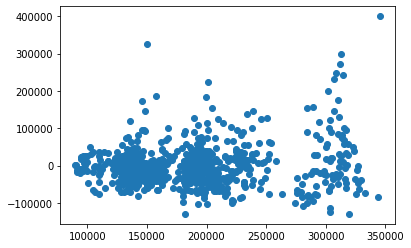

In [ ]:
plt.scatter(y_preds, residuals)

### Based on the above plot, we need to use concave transformation on Y variable to get better prediction.

# Polynomial Regression

In [ ]:
dummied_vars = ['Street_dummy','Alley_dummy']

In [ ]:
input_features = list(X_train[['LotFrontage','LotArea','MSZoning_Kfold_Target_Enc','Neighborhood_Kfold_Target_Enc']].columns) + dummied_vars

In [ ]:
input_features

['LotFrontage',
 'LotArea',
 'MSZoning_Kfold_Target_Enc',
 'Neighborhood_Kfold_Target_Enc',
 'Street_dummy',
 'Alley_dummy']

# ((((

In [ ]:
df = pd.DataFrame({'a':[1,2,3,4],'b':[5,6,7,8], 'c':[0,1,0,1],'d':[1,0,1,0]})

In [ ]:
df

,a,b,c,d
0,1,5,0,1
1,2,6,1,0
2,3,7,0,1
3,4,8,1,0


In [ ]:
df_subset = df[['a','b']]

In [ ]:
df_subset

,a,b
0,1,5
1,2,6
2,3,7
3,4,8


In [ ]:
np.hstack((df_subset**(i+1) for i in range(2)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """Entry point for launching an IPython kernel.


array([[ 1,  5,  1, 25],
       [ 2,  6,  4, 36],
       [ 3,  7,  9, 49],
       [ 4,  8, 16, 64]])

In [ ]:
dummied_features = ['c','d']

In [ ]:
np.hstack((np.hstack((df_subset**(i+1) for i in range(2))), np.array(df[dummied_features])))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """Entry point for launching an IPython kernel.


array([[ 1,  5,  1, 25,  0,  1],
       [ 2,  6,  4, 36,  1,  0],
       [ 3,  7,  9, 49,  0,  1],
       [ 4,  8, 16, 64,  1,  0]])

array([0, 1, 0, 1])

# )))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
def processSubsetCV(feature_set, degree):

    continous_features = []
    dummied_features = []

    for feature in feature_set:
      if '_dummy' not in feature:
        continous_features.append(feature)
      else:
        dummied_feature = feature[:len(feature)-6]
        for X_train_feature in X_train.columns:

          if dummied_feature in X_train_feature:

            dummied_features.append(X_train_feature)
    
    #implement polynomials here
    if len(continous_features) > 0:
      continous_X_train_subset = copy.deepcopy(X_train[continous_features])
      poly_X_train_subset = np.hstack((continous_X_train_subset**(i+1) for i in range(degree)))

      if len(dummied_features) == 1:
        #use one logic for stacking
        poly_X_train_subset = np.hstack((poly_X_train_subset, np.array(X_train[dummied_features]).reshape(-1,1)))
        # dummied_X_train_subset = copy.deepcopy(X_train[dummied_features])

      elif len(dummied_features) > 1:
        # use another logic for stacking
        poly_X_train_subset = np.hstack((poly_X_train_subset, np.array(X_train[dummied_features])))
    # actual_feature_set = continous_features + dummied_features
    else:
      poly_X_train_subset = X_train[dummied_features]

    # Fit model on feature_set and calculate RSS
    # model = sm.OLS(y_train,X_train[actual_feature_set])

    w_model = LinearRegression()

    # w_model = SMWrapper(sm.OLS)
    scores = cross_val_score(w_model, poly_X_train_subset, y_train, cv=5, scoring = 'neg_mean_squared_error')
    # print(degree)
    return {"neg_MSE":scores.mean(),"STD": scores.std(),"features": feature_set, "degree": degree}

In [ ]:
good_features = []
i = 0
models_best = pd.DataFrame(columns=["neg_MSE", "STD","features","degree"])
while True:
  results = []
  for feature in input_features:
    for degree in range(1,5):
      build_model_features = good_features + [feature]
      results.append(processSubsetCV(build_model_features, degree))

  models = pd.DataFrame(results)
  # print(models)
  # Choose the model with the lowest RSS
  good_features = models.loc[models['neg_MSE'].argmax()].features
  i += 1
  models_best.loc[i] = models.loc[models['neg_MSE'].argmax()]

  input_features_set = set(input_features)
  good_features_set = set(good_features)
  input_features = list(input_features_set.difference(good_features_set))


  if len(input_features) == 0:
    break

                neg_MSE                 STD                         features  \
0        -6072140121.34       1120170485.59                    [LotFrontage]   
1        -6219290458.13       1041728336.64                    [LotFrontage]   
2        -8857785679.25       5193400710.73                    [LotFrontage]   
3       -63504324467.28     114469797444.34                    [LotFrontage]   
4        -8721744809.89       5120592423.18                        [LotArea]   
5       -26776108876.34      42363351049.69                        [LotArea]   
6      -309084450317.70     607185086811.71                        [LotArea]   
7  -1036730812945808.75 2073450693112806.50                        [LotArea]   
8        -6102473774.92       1551852604.77      [MSZoning_Kfold_Target_Enc]   
9        -6096463061.28       1552893506.51      [MSZoning_Kfold_Target_Enc]   
10       -6109851197.57       1550659307.55      [MSZoning_Kfold_Target_Enc]   
11       -6111207615.98       1550591845

In [ ]:
models_best

,neg_MSE,STD,features,degree
1,-3131300846.04,1078014745.39,[Neighborhood_Kfold_Target_Enc],1
2,-2859636173.54,898882958.67,"[Neighborhood_Kfold_Target_Enc, LotFrontage]",1
3,-2853911447.56,897181699.74,"[Neighborhood_Kfold_Target_Enc, LotFrontage, S...",1
4,-2854810719.85,886878680.46,"[Neighborhood_Kfold_Target_Enc, LotFrontage, S...",1
5,-2859830630.23,881323693.62,"[Neighborhood_Kfold_Target_Enc, LotFrontage, S...",1
6,-3580227105.02,1728702854.60,"[Neighborhood_Kfold_Target_Enc, LotFrontage, S...",1


In [ ]:
X_train.head()

,LotFrontage,LotArea,MSZoning_Kfold_Target_Enc,Neighborhood_Kfold_Target_Enc,Street_Pave,Alley_No Alley,Alley_Pave
264,75.00,9000,210888.79,227445.73,1,1,0
587,48.00,6240,190050.22,313793.43,1,1,0
56,72.00,10665,190731.97,196186.77,1,1,0
697,75.00,9525,190050.22,199395.34,1,1,0
1145,62.00,7415,192838.87,193032.11,1,1,0


In [ ]:
models_best.loc[models_best['neg_MSE'].argmax()].features

['Neighborhood_Kfold_Target_Enc', 'LotFrontage']